In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [15]:
# Create synthetic data
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


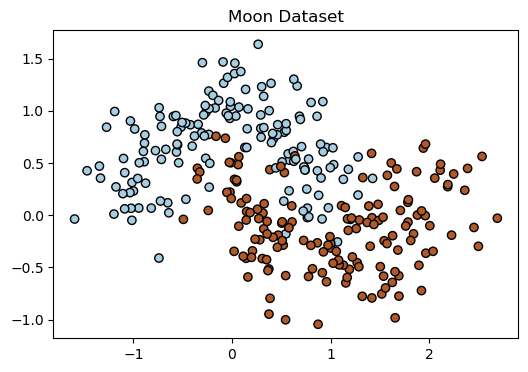

In [16]:
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")
plt.title("Moon Dataset")
plt.show()

In [17]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted 0', 'Predicted 1'], 
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    print(f"{title} Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(classification_report(y_true, y_pred))

RBF Kernel SVM
Accuracy: 0.8888888888888888


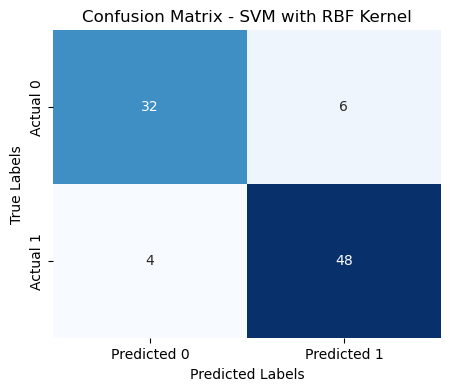

SVM with RBF Kernel Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        38
           1       0.89      0.92      0.91        52

    accuracy                           0.89        90
   macro avg       0.89      0.88      0.89        90
weighted avg       0.89      0.89      0.89        90

              precision    recall  f1-score   support

           0       0.89      0.84      0.86        38
           1       0.89      0.92      0.91        52

    accuracy                           0.89        90
   macro avg       0.89      0.88      0.89        90
weighted avg       0.89      0.89      0.89        90



In [18]:
# RBF Kernel SVM
svm_rbf = SVC(kernel='rbf', gamma=0.7, C=1)
svm_rbf.fit(X_train, y_train)

# Predictions
y_pred_rbf = svm_rbf.predict(X_test)

# Metrics
print("RBF Kernel SVM")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
plot_conf_matrix(y_test, y_pred_rbf, "SVM with RBF Kernel")
print(classification_report(y_test, y_pred_rbf))



Polynomial Kernel SVM
Accuracy: 0.8888888888888888


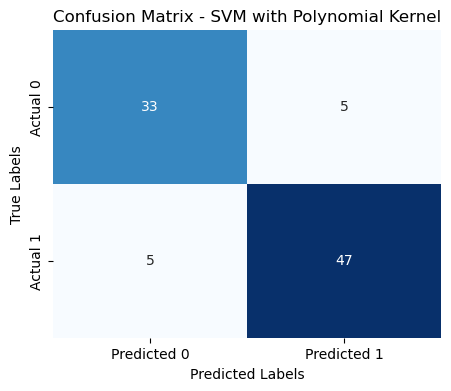

SVM with Polynomial Kernel Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        38
           1       0.90      0.90      0.90        52

    accuracy                           0.89        90
   macro avg       0.89      0.89      0.89        90
weighted avg       0.89      0.89      0.89        90

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        38
           1       0.90      0.90      0.90        52

    accuracy                           0.89        90
   macro avg       0.89      0.89      0.89        90
weighted avg       0.89      0.89      0.89        90



In [19]:
# Polynomial Kernel SVM
svm_poly = SVC(kernel='poly', degree=3, C=1)
svm_poly.fit(X_train, y_train)

# Predictions
y_pred_poly = svm_poly.predict(X_test)

# Metrics
print("\nPolynomial Kernel SVM")
print("Accuracy:", accuracy_score(y_test, y_pred_poly))
plot_conf_matrix(y_test, y_pred_poly, "SVM with Polynomial Kernel")
print(classification_report(y_test, y_pred_poly))


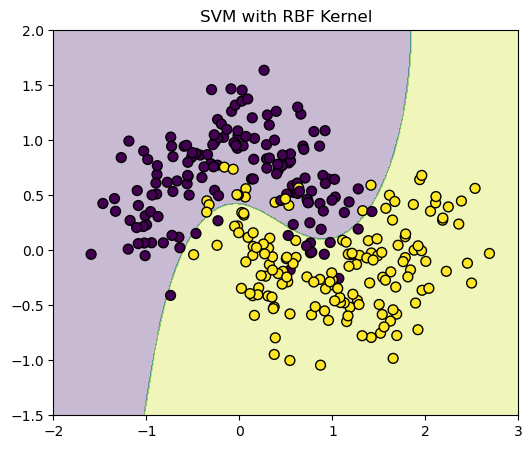

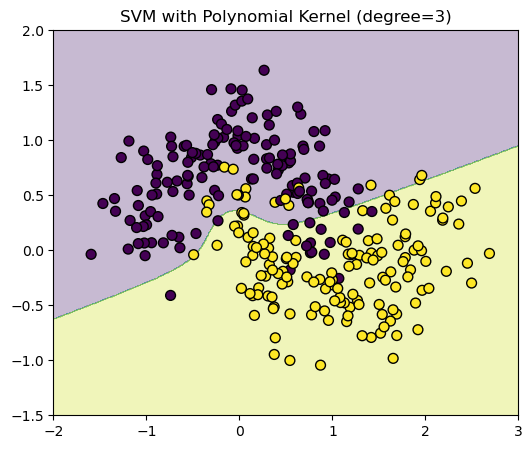

In [20]:
def plot_decision_boundary(model, X, y, title):
    plt.figure(figsize=(6,5))
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid
    xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1.5, 2, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot contour
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=50)
    plt.title(title)
    plt.show()

plot_decision_boundary(svm_rbf, X, y, "SVM with RBF Kernel")
plot_decision_boundary(svm_poly, X, y, "SVM with Polynomial Kernel (degree=3)")
